In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Task
1. Use at least two models from different model family, based on the kind of DS task with details on why it was chosen. 
1. Perform feature selection & hyperparameter tuning both using normal method and leveraging automatic tuning 
1. Perform evaluation on atleast two different metrics for both the models. 


In [2]:
# read raw dataset
df = pd.read_csv('Churn_Modelling_Assortment.csv')

## Logistic Regression

Logistic Regression performs well when the dataset is linearly separable. It can interpret model coefficients as indicators of feature importance. It is also very fast and a common method used for binary classification.

In [3]:
# take selected features
X = df[['credit_score', 'age', 'tenure', 'balance', 
         'num_products', 'has_credit_card', 'active_member','estimated_salary', 
         'male', 'france', 'germany', 'spain', 'zero_balance', 'age_bucket', 
         'salary_bucket_2', 'salary_bucket_1', 'salary_bucket_4', 'salary_bucket_3', 
         'cs_bucket_2', 'cs_bucket_4','cs_bucket_1', 'cs_bucket_3']]
y = df['exited']
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# initialise model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# predict
predictions = logmodel.predict(X_test)
# evaluate
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2657
           1       0.45      0.08      0.14       643

    accuracy                           0.80      3300
   macro avg       0.63      0.53      0.51      3300
weighted avg       0.74      0.80      0.74      3300

[[2592   65]
 [ 590   53]]


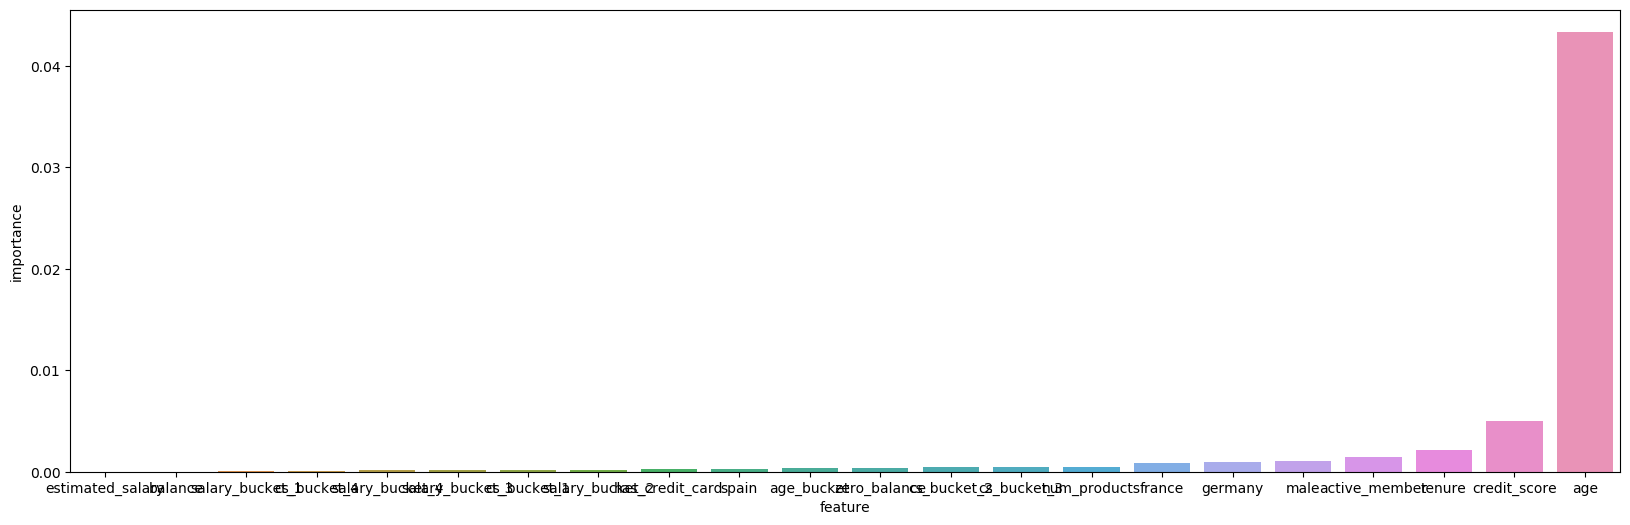

In [4]:
d = {'feature': X.columns, 'importance': logmodel.coef_[0]}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

In [21]:
# try again with 
X = df[[ 'age', 'tenure', 'num_products',  'active_member',
         'male', 'france', 'germany']]
y = df['exited']
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# initialise model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# predict
predictions = logmodel.predict(X_test)
# evaluate
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2657
           1       0.58      0.22      0.32       643

    accuracy                           0.82      3300
   macro avg       0.71      0.59      0.61      3300
weighted avg       0.79      0.82      0.78      3300

[[2555  102]
 [ 502  141]]


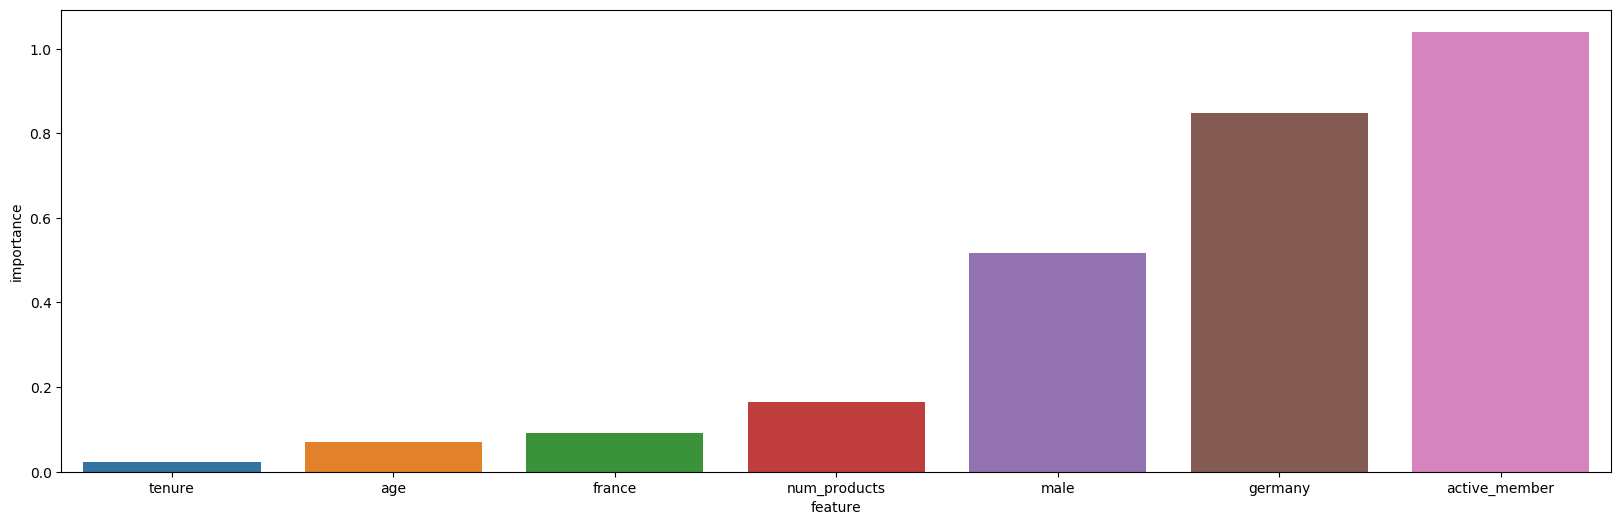

In [22]:
d = {'feature': X.columns, 'importance': logmodel.coef_[0]}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

Conclusions: This model initially has an average f1 score of 51%, and with feature engineering this increases to 61%. Not great.

## KNN

The KNN classification algorithm is often used for classifying the data, as well as for regression on continuous numeric data. It is used for not just binary classification but for multilevel classifications too. It is a non-parametric machine learning method implying that it doesn’t make any assumptions about the data. It also doesn’t make any generalizations, and simply checks the neighboring data points to determine the classification of unknown or uncategorized data points. 

In [7]:
X = df[['credit_score', 'age', 'tenure', 'balance', 
         'num_products', 'has_credit_card', 'active_member','estimated_salary', 
         'male', 'france', 'germany', 'spain', 'zero_balance', 'age_bucket', 
         'salary_bucket_2', 'salary_bucket_1', 'salary_bucket_4', 'salary_bucket_3', 
         'cs_bucket_2', 'cs_bucket_4','cs_bucket_1', 'cs_bucket_3']]
y = df['exited']

In [8]:
# need to use a scalar for knn to normalise the data in each axis
scaler = StandardScaler()
scaler.fit(X)

scaled_features = scaler.transform(X)

#convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()


X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)

# Using n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2387
           1       0.41      0.37      0.39       613

    accuracy                           0.76      3000
   macro avg       0.63      0.62      0.62      3000
weighted avg       0.75      0.76      0.76      3000

[[2062  325]
 [ 388  225]]


Average f1 score is 68%

Text(0, 0.5, 'Error Rate')

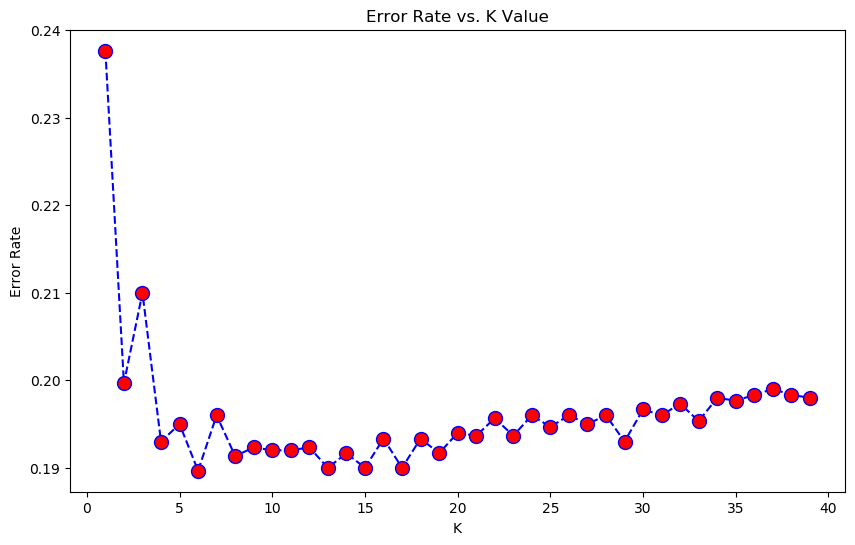

In [9]:
# Looping through options for n
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [10]:
# Chose k=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


WITH K=30


              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2387
           1       0.67      0.14      0.23       613

    accuracy                           0.81      3000
   macro avg       0.74      0.56      0.56      3000
weighted avg       0.79      0.81      0.76      3000

[[2344   43]
 [ 527   86]]


## Decision Tree

In [29]:
X = df[['credit_score', 'age', 'tenure', 'balance', 
         'num_products', 'has_credit_card', 'active_member','estimated_salary', 
         'male', 'france', 'germany', 'spain', 'zero_balance', 'age_bucket', 
         'salary_bucket_2', 'salary_bucket_1', 'salary_bucket_4', 'salary_bucket_3', 
         'cs_bucket_2', 'cs_bucket_4','cs_bucket_1', 'cs_bucket_3']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

## Predictions and Evaluation of Decision Tree

predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2408
           1       0.49      0.53      0.51       592

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.80      0.80      0.80      3000

[[2084  324]
 [ 280  312]]


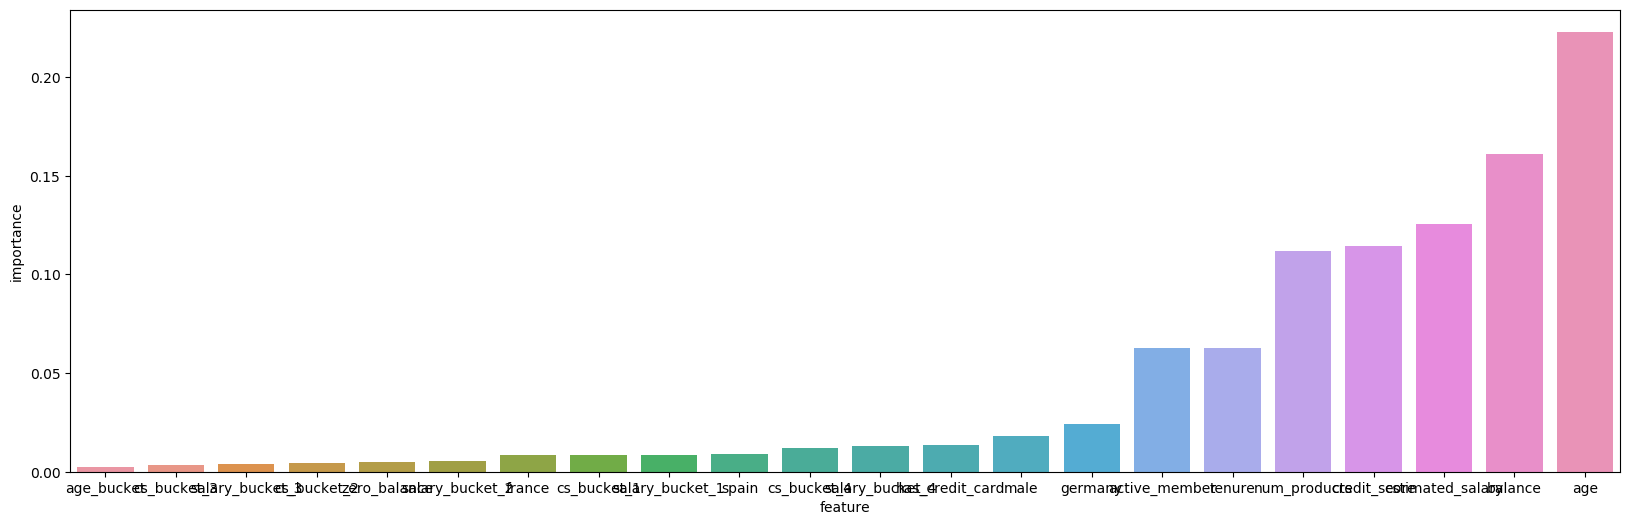

In [30]:
d = {'feature': X.columns, 'importance': dtree.feature_importances_}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

In [37]:
X = df[['age', 'balance', 'estimated_salary', 'credit_score',
       'num_products', 'tenure', 'active_member', 'germany', 'male',
       'has_credit_card']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

## Predictions and Evaluation of Decision Tree

predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2379
           1       0.50      0.51      0.50       621

    accuracy                           0.79      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.79      0.79      0.79      3000

[[2063  316]
 [ 306  315]]


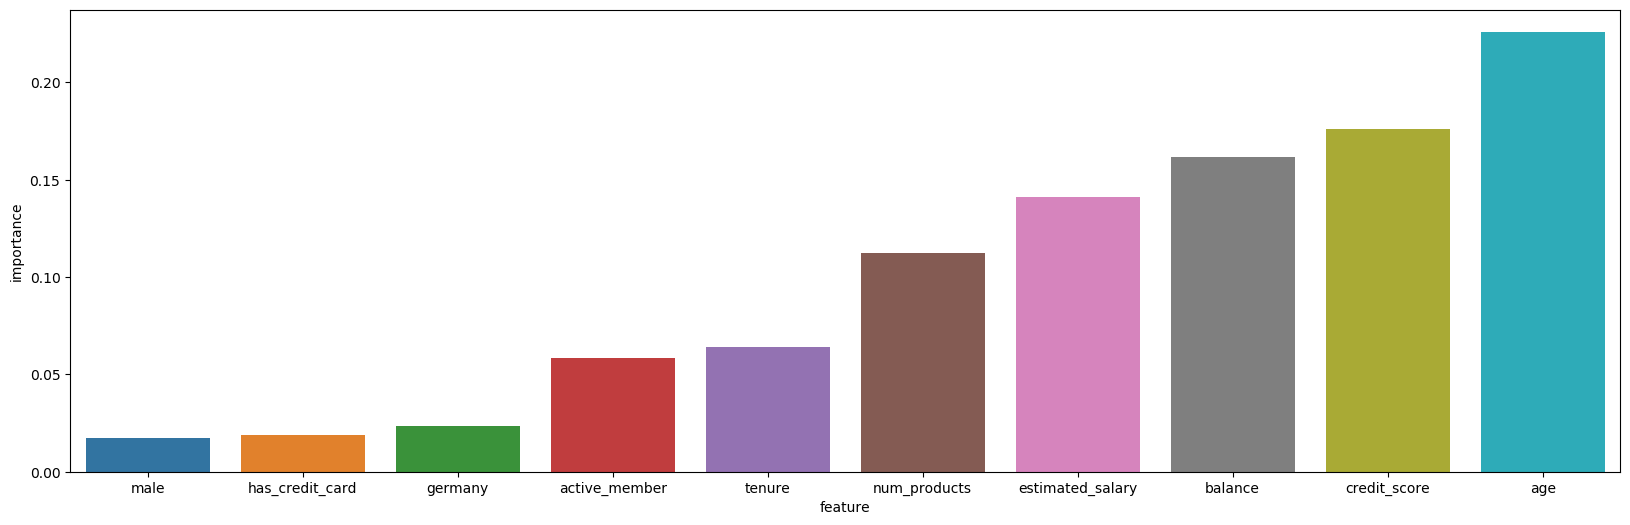

In [38]:
d = {'feature': X.columns, 'importance': dtree.feature_importances_}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

## Grid Search to tune variables

In [39]:
X = df[['credit_score', 'age', 'tenure', 'balance', 
         'num_products', 'has_credit_card', 'active_member','estimated_salary', 
         'male', 'france', 'germany', 'spain', 'zero_balance', 'age_bucket', 
         'salary_bucket_2', 'salary_bucket_1', 'salary_bucket_4', 'salary_bucket_3', 
         'cs_bucket_2', 'cs_bucket_4','cs_bucket_1', 'cs_bucket_3']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
## Gridsearch for automatic parameter tuning
tree_param = {'criterion' :["entropy"],
        'splitter' :["best", "random"],
        'max_depth' :[1,2,3,4,5,6,7],
        'min_samples_split':[5,20,50,100],
        'min_samples_leaf':[5,20,50,100]
             }

grid = GridSearchCV(DecisionTreeClassifier(),tree_param,refit=True,verbose=2)
grid.fit(X_train,y_train)

grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=50, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_sa

[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed:   14.8s finished


In [40]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 100,
 'splitter': 'best'}

In [41]:
X = df[['credit_score', 'age', 'tenure', 'balance', 
         'num_products', 'has_credit_card', 'active_member','estimated_salary', 
         'male', 'france', 'germany', 'spain', 'zero_balance', 'age_bucket', 
         'salary_bucket_2', 'salary_bucket_1', 'salary_bucket_4', 'salary_bucket_3', 
         'cs_bucket_2', 'cs_bucket_4','cs_bucket_1', 'cs_bucket_3']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeClassifier(**grid.best_params_)
dtree.fit(X_train,y_train)

## Predictions and Evaluation of Decision Tree

predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2392
           1       0.79      0.45      0.58       608

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

[[2320   72]
 [ 332  276]]


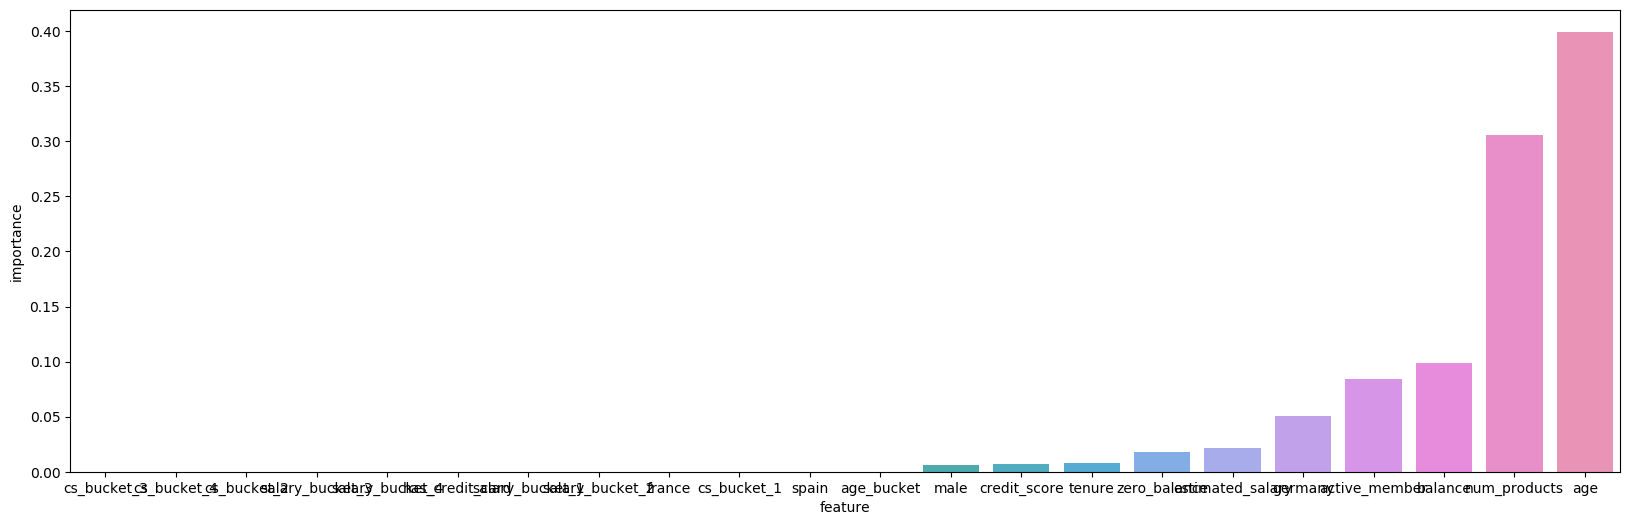

In [42]:
d = {'feature': X.columns, 'importance': dtree.feature_importances_}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)